In [107]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [108]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
response = {
    "rafter_dist": 2,
    "ridge_pts": [
        [
            903.3977348434377,
            595.6029313790806
        ],
        [
            435.709526982012,
            648.5676215856096
        ]
    ],
    "eve_pts": [
        [
            460.692871419054,
            866.4223850766156
        ],
        [
            830.4463690872751,
            818.454363757495
        ]
    ],
    "mt_per_px": 0.06431112342582257,
    "roof_pts": [
        {
            "x": 903.3977348434377,
            "y": 595.6029313790806
        },
        {
            "x": 435.709526982012,
            "y": 648.5676215856096
        },
        {
            "x": 460.692871419054,
            "y": 866.4223850766156
        },
        {
            "x": 830.4463690872751,
            "y": 818.454363757495
        },
        {
            "x": 816.4556962025316,
            "y": 715.5229846768821
        },
        {
            "x": 905.396402398401,
            "y": 700.5329780146569
        },
        {
            "x": 903.3977348434377,
            "y": 595.6029313790806
        }
    ]
}

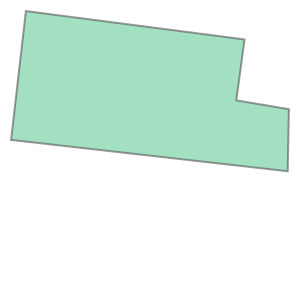

In [110]:
from shapely import geometry 

# Convert roof_pts to a list of tuples
roof_pts = [(pt['x'], pt['y']) for pt in response['roof_pts']]
poly = geometry.Polygon(roof_pts)

poly

In [111]:
rafter_calc_res = {
  "points": {
    "count": 24,
    "points": [
      [
        884.5603055737741,
        597.7362299929528
      ],
      [
        865.7228763041106,
        599.8695286068249
      ],
      [
        846.8854470344471,
        602.002827220697
      ],
      [
        828.0480177647836,
        604.1361258345692
      ],
      [
        809.2105884951201,
        606.2694244484413
      ],
      [
        790.3731592254566,
        608.4027230623135
      ],
      [
        771.5357299557929,
        610.5360216761857
      ],
      [
        752.6983006861295,
        612.6693202900578
      ],
      [
        733.860871416466,
        614.8026189039299
      ],
      [
        715.0234421468025,
        616.9359175178021
      ],
      [
        696.186012877139,
        619.0692161316742
      ],
      [
        677.3485836074755,
        621.2025147455464
      ],
      [
        658.511154337812,
        623.3358133594186
      ],
      [
        639.6737250681484,
        625.4691119732908
      ],
      [
        620.8362957984849,
        627.6024105871628
      ],
      [
        601.9988665288215,
        629.735709201035
      ],
      [
        583.1614372591579,
        631.8690078149071
      ],
      [
        564.3240079894945,
        634.0023064287793
      ],
      [
        545.486578719831,
        636.1356050426515
      ],
      [
        526.6491494501673,
        638.2689036565237
      ],
      [
        507.81172018050387,
        640.4022022703957
      ],
      [
        488.9742909108403,
        642.5355008842679
      ],
      [
        470.13686164117684,
        644.6687994981401
      ],
      [
        451.2994323715133,
        646.8020981120122
      ]
    ]
  },
  "rafters_tips": [
    [
      908.4107401040126,
      808.3400669769452
    ],
    [
      889.6079624885174,
      810.7793462351716
    ],
    [
      870.8051848730222,
      813.218625493398
    ],
    [
      852.002407257527,
      815.6579047516244
    ],
    [
      833.1996296420317,
      818.0971840098508
    ],
    [
      814.3968520265365,
      820.5364632680772
    ],
    [
      795.5940744110413,
      822.9757425263036
    ],
    [
      776.7912967955463,
      825.41502178453
    ],
    [
      757.9885191800511,
      827.8543010427564
    ],
    [
      739.1857415645559,
      830.2935803009829
    ],
    [
      720.3829639490607,
      832.7328595592093
    ],
    [
      701.5801863335654,
      835.1721388174357
    ],
    [
      682.7774087180703,
      837.6114180756621
    ],
    [
      663.9746311025751,
      840.0506973338885
    ],
    [
      645.1718534870799,
      842.4899765921149
    ],
    [
      626.3690758715848,
      844.9292558503413
    ],
    [
      607.5662982560895,
      847.3685351085677
    ],
    [
      588.7635206405944,
      849.8078143667941
    ],
    [
      569.9607430250992,
      852.2470936250205
    ],
    [
      551.1579654096039,
      854.6863728832469
    ],
    [
      532.3551877941088,
      857.1256521414732
    ],
    [
      513.5524101786135,
      859.5649313996997
    ],
    [
      494.7496325631184,
      862.004210657926
    ],
    [
      475.9468549476232,
      864.4434899161524
    ]
  ],
  "status": True
}


In [112]:
# ridge_pts = response['ridge_pts']
# eve_pts = response['eve_pts']

# # ridge_idx_1 = 0
# # ridge_idx_2 = 0

# # eve_idx_1 = 0
# # eve_idx_2 = 0
def get_ridge_eve_indices(roof_pts, ridge_pts, eve_pts):
    pt_locations = {
        "r1": -1, 
        "r2": -1,
        "e1" : -1, 
        "e2": -1
    }
    
    for idx in range(len(roof_pts)):
        roof_pt = roof_pts[idx]
        x, y = roof_pt['x'], roof_pt['y']
        
        if(x==ridge_pts[0][0]) & (y==ridge_pts[0][1]):
            pt_locations['r1'] = idx if pt_locations['r1']==-1 else pt_locations['r1']
        if(x==ridge_pts[1][0]) & (y==ridge_pts[1][1]):
            pt_locations['r2'] = idx if pt_locations['r2']==-1 else pt_locations['r2']
        if(x==eve_pts[0][0]) & (y==eve_pts[0][1]):
            pt_locations['e1'] = idx if pt_locations['e1']==-1 else pt_locations['e1']
        if(x==eve_pts[1][0]) & (y==eve_pts[1][1]):
            pt_locations['e2'] =idx if pt_locations['e2']==-1 else pt_locations['e2']
    
    return pt_locations


# roof pts

In [113]:
# roof_pts = response['roof_pts']


In [114]:
# pt_locations = get_ridge_eve_indices(roof_pts, ridge_pts, eve_pts)

In [115]:

# ridge_eve = [ (pt_locations['r1'], pt_locations['r2']),  (pt_locations['e1'], pt_locations['e2'])] 
# ridge_eve

In [116]:
# pts_idx = list(range(1, len(roof_pts)))
# line_segments = list(enumerate(pts_idx))
# line_segments = [i for i in line_segments if i not in ridge_eve]
# line_segments

In [117]:
# def seggrate_lines(no_of_roof_pts):
#     pts_idx = list(range(1, no_of_roof_pts))
#     line_segments = list(enumerate(pts_idx))
#     line_segments = [i for i in line_segments if i not in ridge_eve]
#     line_segments

### from above we are able bring all the line segmet point indices which are not part of ridge or eve

## Making Rafter Line segments

In [118]:
# no_of_rafters = len(rafter_calc_res['points']['points'])

In [119]:
# rafter_start_pts = rafter_calc_res['points']['points']
# rafter_tips = rafter_calc_res['rafters_tips']

In [120]:
# no_of_rafters

In [121]:
# rafter_lines = [ [rafter_start_pts[i], rafter_tips[i]] for i in range(no_of_rafters) ]

1. step1: check weather the rafter line is cutting any of the remaining lines in the roof plane
2. step2: check if the starting point is on rafter and also endoing point is on rafter


assuming the rafter meets only one side in the entire set of sides. 

```
get the rafter, ridge, eve
if rafter_start, rafter_end are in ridge and eve:
    pass
else:
    check the start is in ridge or end is on ridge:
        if start is in ridge:
            find poi of other end with any other side.

 
```

In [122]:
def extract_x_y(line_pts):
    line_pts = np.array(line_pts)
    return line_pts[:, :1].flatten(), line_pts[:, 1:].flatten()

In [123]:
def calc_distance(point):

    dist = ( (point[1][0] - point[0][0])**2 + (point[1][1] - point[0][1])**2 )**0.5
    return dist

In [124]:
def calc_poi(line_1, line_2):
    line_1 = np.array(line_1)
    line_2_x, line_2_y = extract_x_y(line_2)

    line_2 = np.array(line_2)
    line_1_x, line_1_y = extract_x_y(line_1)

    line_2_dx = line_2_x[1] - line_2_x[0]
    line_2_dy = line_2_y[1] - line_2_y[0]

    line_1_dx = line_1_x[1] - line_1_x[0]
    line_1_dy = line_1_y[1] - line_1_y[0]

    line_2_slope = line_2_dy / line_2_dx
    line_1_slope = line_1_dy / line_1_dx

    line_1_c = line_1_y[0] - (line_1_slope * line_1_x[0])
    line_2_c = line_2_y[0] - (line_2_slope * line_2_x[0])

    x = (line_1_c - line_2_c) / (line_2_slope - line_1_slope)
    y = (line_2_slope*x) + line_2_c

    return x, y

A-----c---------------B  



A--------------B------c


c----A----------------B


    c
A--------------------B

In [125]:
def check_point_bwn_AB(point, line, tolerence=0.0000000001):
    A = line[0]
    B = line[1]
    AC = calc_distance([A, point])
    BC = calc_distance([B, point])
    AB = calc_distance(line)

    status = (AB <= AC+BC+tolerence) & (AB >= (AC+BC)-tolerence)
    return status

### Step 1

In [126]:
ridge_pts = response['ridge_pts']
eve_pts = response['eve_pts']
roof_pts = response['roof_pts']

pt_locations = get_ridge_eve_indices(roof_pts, ridge_pts, eve_pts)
pt_locations

{'r1': 0, 'r2': 1, 'e1': 2, 'e2': 3}

### Step 2

In [127]:
rafter_start_pts = rafter_calc_res['points']['points']
rafter_tips = rafter_calc_res['rafters_tips']

In [128]:
def seggrate_lines(no_of_roof_pts, pt_locations):
    ridge_eve = [ (pt_locations['r1'], pt_locations['r2']),  (pt_locations['e1'], pt_locations['e2'])] 
    pts_idx = list(range(1, no_of_roof_pts))
    line_segments = list(enumerate(pts_idx))
    line_segments = [i for i in line_segments if i not in ridge_eve]
    return {"ridge_eve": ridge_eve, "line_segments": line_segments }

### Seggregation of Lines

In [129]:
line_seggregation = seggrate_lines(len(roof_pts), pt_locations)
ridge_eve = line_seggregation.get('ridge_eve', [])
line_segments = line_seggregation.get('line_segments', [])
ridge_eve, line_segments

([(0, 1), (2, 3)], [(1, 2), (3, 4), (4, 5), (5, 6)])

### creating rafter lines

In [130]:
no_of_rafters = len(rafter_start_pts)

In [131]:
rafter_lines = [ [rafter_start_pts[i], rafter_tips[i]] for i in range(no_of_rafters) ]
# # rafter_lines

In [132]:
def recalc_rafters(rafter_lines , ridge_pts, eve_pts, roof_pts, ):
    new_rafters = []

    no_of_rafters = len(rafter_lines)
    for rafter in rafter_lines:
       
    
        rafter_start, rafter_end = rafter[0], rafter[1]
    
        raf_start_is_ridge = check_point_bwn_AB(rafter_start, ridge_pts)
        raf_start_is_eve = check_point_bwn_AB(rafter_start, eve_pts)
        raf_end_is_ridge = check_point_bwn_AB(rafter_end, ridge_pts)
        raf_end_is_eve = check_point_bwn_AB(rafter_end, eve_pts)
    
        if( (raf_start_is_ridge & raf_end_is_eve) | (raf_start_is_eve & raf_end_is_ridge) ):
            new_rafter = rafter
            new_rafters.append(new_rafter)
        else:
            for line in  line_segments:
                line_start = [roof_pts[line[0]]['x'], roof_pts[line[0]]['y']]
                line_end = [roof_pts[line[1]]['x'], roof_pts[line[1]]['y']]
    
                side = [ line_start, line_end ]
                assumption_poi = calc_poi(side, rafter)
                if (raf_start_is_ridge & (not raf_end_is_eve)):
                    if(check_point_bwn_AB(assumption_poi, side)):
                        new_rafter = [rafter_start, assumption_poi]
                        new_rafters.append(new_rafter)
                        break
                    # change the rafter end 
                elif ((not raf_start_is_ridge) & (raf_end_is_eve)):
                    # change the rafter start
                    if(check_point_bwn_AB(assumption_poi, side)):
                        new_rafter = [assumption_poi, rafter_end]
                        new_rafters.append(new_rafter)
                        break;
    return new_rafters

        
        

In [133]:
new_rafters = recalc_rafters(rafter_lines, ridge_pts, eve_pts, roof_pts)


print("the new rafter are" , new_rafters)

the new rafter are [[[884.5603055737741, 597.7362299929528], (np.float64(896.3740252098839), np.float64(702.0536033835078))], [[865.7228763041106, 599.8695286068249], (np.float64(877.6523399670716), np.float64(705.2089435929711))], [[846.8854470344471, 602.002827220697], (np.float64(858.9306547242592), np.float64(708.3642838024334))], [[828.0480177647836, 604.1361258345692], (np.float64(840.2089694814466), np.float64(711.5196240118958))], [[809.2105884951201, 606.2694244484413], (np.float64(821.4872842386343), np.float64(714.674964221359))], [[790.3731592254566, 608.4027230623135], [814.3968520265365, 820.5364632680772]], [[771.5357299557929, 610.5360216761857], [795.5940744110413, 822.9757425263036]], [[752.6983006861295, 612.6693202900578], [776.7912967955463, 825.41502178453]], [[733.860871416466, 614.8026189039299], [757.9885191800511, 827.8543010427564]], [[715.0234421468025, 616.9359175178021], [739.1857415645559, 830.2935803009829]], [[696.186012877139, 619.0692161316742], [720.

In [134]:
ridge_pts

[[903.3977348434377, 595.6029313790806], [435.709526982012, 648.5676215856096]]

In [135]:
# ridge_pts

In [136]:
r_x, r_y = extract_x_y(ridge_pts)

raf_x, raf_y = extract_x_y(rafter_start_pts)

e_x, e_y = extract_x_y(eve_pts)

raf_eve_x, raf_eve_y = extract_x_y(rafter_tips)

new_rdge_pts_x, new_rdge_pts_y = extract_x_y(new_rafters)
 
# exp_x, exp_y = extract_x_y(calc_projection(sides['eve'], sides['ridge']))

the rails are [[(np.float64(896.3740252098839), np.float64(702.0536033835078)), (np.float64(877.6523399670716), np.float64(705.2089435929711))], [(np.float64(877.6523399670716), np.float64(705.2089435929711)), (np.float64(858.9306547242592), np.float64(708.3642838024334))], [(np.float64(858.9306547242592), np.float64(708.3642838024334)), (np.float64(840.2089694814466), np.float64(711.5196240118958))], [(np.float64(840.2089694814466), np.float64(711.5196240118958)), (np.float64(821.4872842386343), np.float64(714.674964221359))], [(np.float64(821.4872842386343), np.float64(714.674964221359)), [814.3968520265365, 820.5364632680772]], [[814.3968520265365, 820.5364632680772], [795.5940744110413, 822.9757425263036]], [[795.5940744110413, 822.9757425263036], [776.7912967955463, 825.41502178453]], [[776.7912967955463, 825.41502178453], [757.9885191800511, 827.8543010427564]], [[757.9885191800511, 827.8543010427564], [739.1857415645559, 830.2935803009829]], [[739.1857415645559, 830.293580300982

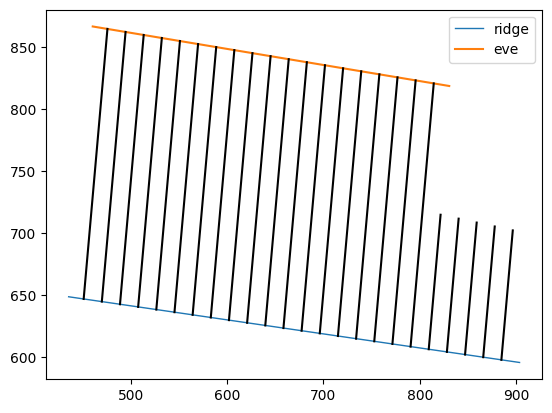

In [ ]:
def plot_img():

    plt.plot(r_x, r_y, label="ridge", linewidth=1)
    # plt.scatter(raf_x, raf_y)

    plt.plot(e_x, e_y, label="eve")
    # plt.scatter(raf_eve_x, raf_eve_y)

    # plt.plot(roof_side1[0], roof_side1[1], c='blue', linestyle="dashed" )
    # plt.plot(roof_side2[0], roof_side2[1], c='blue', linestyle="dashed" )
    # plt.plot(new_rdge_pts_x, new_rdge_pts_y)
    for i in new_rafters:
        _x, _y = extract_x_y(i)
        plt.plot(_x, _y, color='black')
    plt.legend()
    # plt.plot(exp_x, exp_y, c="r", linestyle="dashed")
    # plt.scatter(18.860524810780408, 26.028350181857476)
    # plt.plot(new_rdge_pts_x, new_rdge_pts_x, label="eve")
    
    # plt.ylim(0,100)

plot_img()

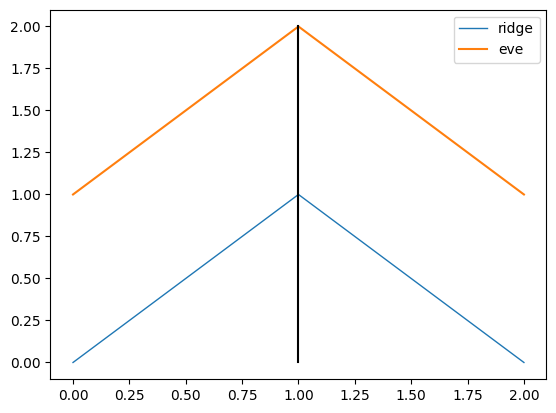

In [138]:
import matplotlib.pyplot as plt
import numpy as np

def extract_x_y(line_pts):
    line_pts = np.array(line_pts)
    return line_pts[:, :1].flatten(), line_pts[:, 1:].flatten()

def plot_img():
    # Ensure these variables are defined before calling plot_img()
    r_x = [0, 1, 2]
    r_y = [0, 1, 0]
    e_x = [0, 1, 2]
    e_y = [1, 2, 1]
    new_rafters = [([0, 1], [0, 1]), ([1, 2], [1, 0])]

    plt.plot(r_x, r_y, label="ridge", linewidth=1)
    plt.plot(e_x, e_y, label="eve")

    for i in new_rafters:
        _x, _y = extract_x_y(i)
        plt.plot(_x, _y, color='black')
    
    # Generate points for multiple horizontal lines
    x_min = min(min(r_x), min(e_x))
    x_max = max(max(r_x), max(e_x))
    y_values = [0.5, 1.0, 1.5]  # Change these values to the desired y-coordinates

    for y in y_values:
        horizontal_x = [x_min, x_max]
        horizontal_y = [y, y]
        # plt.plot(horizontal_x, horizontal_y, color = 'red', label=f'horizontal line at y={y}')

    plt.legend()
    plt.show()

plot_img()

In [139]:
data = {
    "rafter_dist": 2,
    "ridge_pts": [
        [
            923.7692547876769,
            593.5093151540383
        ],
        [
            458.15726477935056,
            658.4551935886761
        ]
    ],
    "eve_pts": [
        [
            476.14227726894256,
            854.2919962531224
        ],
        [
            840.8383638634471,
            820.3203059950041
        ]
    ],
    "mt_per_px": 0.06431112354562518,
    "roof_pts": [
        {
            "x": 923.7692547876769,
            "y": 593.5093151540383
        },
        {
            "x": 458.15726477935056,
            "y": 658.4551935886761
        },
        {
            "x": 476.14227726894256,
            "y": 854.2919962531224
        },
        {
            "x": 840.8383638634471,
            "y": 820.3203059950041
        },
        {
            "x": 827.8491881765195,
            "y": 710.4118963363863
        },
        {
            "x": 935.7592631140716,
            "y": 699.4210553705245
        },
        {
            "x": 923.7692547876769,
            "y": 593.5093151540383
        }
    ]
}

In [140]:
# import json
# res = requests.post("http://127.0.0.1:9000/calc/rafters/", data=json.dumps(data))

In [141]:
# res.status_code

In [142]:
# json.loads(res.content.decode('utf-8'))

POLYGON ((165.61456298828125 212, 217.61456298828125 333, 337.61456298828125 256, 276.61456298828125 165, 168.61456298828125 208, 165.61456298828125 212))


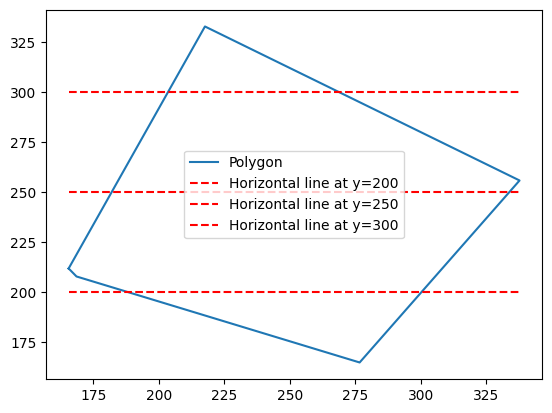

In [ ]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Corrected points format
points = [
    {
        "attachedLineSeqIds": [
            -1,
            0
        ],
        "coords": {
            "x": 165.61456298828125,
            "y": 212
        },
        "obj": {
            "radius": 4,
            "startAngle": 0,
            "endAngle": 360,
            "counterClockwise": false,
            "type": "Circle",
            "version": "6.2.0",
            "originX": "center",
            "originY": "center",
            "left": 165.6146,
            "top": 212,
            "width": 8,
            "height": 8,
            "fill": "green",
            "stroke": null,
            "strokeWidth": 1,
            "strokeDashArray": null,
            "strokeLineCap": "butt",
            "strokeDashOffset": 0,
            "strokeLineJoin": "miter",
            "strokeUniform": false,
            "strokeMiterLimit": 4,
            "scaleX": 1,
            "scaleY": 1,
            "angle": 0,
            "flipX": false,
            "flipY": false,
            "opacity": 1,
            "shadow": null,
            "visible": true,
            "backgroundColor": "",
            "fillRule": "nonzero",
            "paintFirst": "fill",
            "globalCompositeOperation": "source-over",
            "skewX": 0,
            "skewY": 0
        }
    },
    {
        "attachedLineSeqIds": [
            0,
            1
        ],
        "coords": {
            "x": 217.61456298828125,
            "y": 333
        },
        "obj": {
            "radius": 4,
            "startAngle": 0,
            "endAngle": 360,
            "counterClockwise": false,
            "type": "Circle",
            "version": "6.2.0",
            "originX": "center",
            "originY": "center",
            "left": 217.6146,
            "top": 333,
            "width": 8,
            "height": 8,
            "fill": "green",
            "stroke": null,
            "strokeWidth": 1,
            "strokeDashArray": null,
            "strokeLineCap": "butt",
            "strokeDashOffset": 0,
            "strokeLineJoin": "miter",
            "strokeUniform": false,
            "strokeMiterLimit": 4,
            "scaleX": 1,
            "scaleY": 1,
            "angle": 0,
            "flipX": false,
            "flipY": false,
            "opacity": 1,
            "shadow": null,
            "visible": true,
            "backgroundColor": "",
            "fillRule": "nonzero",
            "paintFirst": "fill",
            "globalCompositeOperation": "source-over",
            "skewX": 0,
            "skewY": 0
        }
    },
    {
        "attachedLineSeqIds": [
            1,
            2
        ],
        "coords": {
            "x": 337.61456298828125,
            "y": 256
        },
        "obj": {
            "radius": 4,
            "startAngle": 0,
            "endAngle": 360,
            "counterClockwise": false,
            "type": "Circle",
            "version": "6.2.0",
            "originX": "center",
            "originY": "center",
            "left": 337.6146,
            "top": 256,
            "width": 8,
            "height": 8,
            "fill": "green",
            "stroke": null,
            "strokeWidth": 1,
            "strokeDashArray": null,
            "strokeLineCap": "butt",
            "strokeDashOffset": 0,
            "strokeLineJoin": "miter",
            "strokeUniform": false,
            "strokeMiterLimit": 4,
            "scaleX": 1,
            "scaleY": 1,
            "angle": 0,
            "flipX": false,
            "flipY": false,
            "opacity": 1,
            "shadow": null,
            "visible": true,
            "backgroundColor": "",
            "fillRule": "nonzero",
            "paintFirst": "fill",
            "globalCompositeOperation": "source-over",
            "skewX": 0,
            "skewY": 0
        }
    },
    {
        "attachedLineSeqIds": [
            2,
            3
        ],
        "coords": {
            "x": 276.61456298828125,
            "y": 165
        },
        "obj": {
            "radius": 4,
            "startAngle": 0,
            "endAngle": 360,
            "counterClockwise": false,
            "type": "Circle",
            "version": "6.2.0",
            "originX": "center",
            "originY": "center",
            "left": 276.6146,
            "top": 165,
            "width": 8,
            "height": 8,
            "fill": "green",
            "stroke": null,
            "strokeWidth": 1,
            "strokeDashArray": null,
            "strokeLineCap": "butt",
            "strokeDashOffset": 0,
            "strokeLineJoin": "miter",
            "strokeUniform": false,
            "strokeMiterLimit": 4,
            "scaleX": 1,
            "scaleY": 1,
            "angle": 0,
            "flipX": false,
            "flipY": false,
            "opacity": 1,
            "shadow": null,
            "visible": true,
            "backgroundColor": "",
            "fillRule": "nonzero",
            "paintFirst": "fill",
            "globalCompositeOperation": "source-over",
            "skewX": 0,
            "skewY": 0
        }
    }
]

# Create the polygon
poly = Polygon(points)

# Print the polygon to verify
print(poly)

# Plot the polygon
x, y = poly.exterior.xy
plt.plot(x, y, label="Polygon")

# Define y-coordinates for horizontal lines
y_values = [200, 250, 300]  # Change these values to the desired y-coordinates

# Plot horizontal lines
for y in y_values:
    plt.plot([min(x), max(x)], [y, y], color='red', linestyle='--', label=f'Horizontal line at y={y}')

plt.legend()
plt.show()